In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
chq_dataset=pd.read_csv(r"C:\Users\pc\Desktop\Data Science Assignments\Decision Trees\Fraud_check.csv")
chq_dataset.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Label Encoding
from sklearn import preprocessing
label=['Undergrad','Marital.Status','Urban']
label_encoder=preprocessing.LabelEncoder()
for i in label:
    chq_dataset[i]=label_encoder.fit_transform(chq_dataset[i])

In [4]:
chq_dataset

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [5]:
chq_dataset['taxincome']=chq_dataset['Taxable.Income']

In [6]:
del chq_dataset['Taxable.Income']
chq_dataset

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxincome
0,0,2,50047,10,1,68833
1,1,0,134075,18,1,33700
2,0,1,160205,30,1,36925
3,1,2,193264,15,1,50190
4,0,1,27533,28,0,81002
...,...,...,...,...,...,...
595,1,0,39492,7,1,76340
596,1,0,55369,2,1,69967
597,0,0,154058,0,1,47334
598,1,1,180083,17,0,98592


# spliting the data

In [7]:
x=chq_dataset.iloc[:,0:5]
y=chq_dataset['taxincome']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

# building decision tree model

In [9]:
model=DecisionTreeRegressor()

In [10]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [11]:
prdct=model.predict(x_test)

In [12]:
df=pd.DataFrame({'y_test':y_test,'prdct':prdct})
df

,y_test,prdct
514,60789,73795.0
216,31409,77735.0
529,33116,83357.0
141,56647,46939.0
422,99311,17957.0
...,...,...
572,39818,63543.0
25,31417,96032.0
325,94013,91462.0
549,91220,98334.0


In [13]:
score = model.score(x_train, y_train)
print("R-squared:", score) 

R-squared: 1.0


In [14]:
l=model.predict(x_train)

In [15]:
final_data=x_train

In [16]:
final_data['taxincome']=l

In [17]:
final_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxincome
120,1,2,135886,11,1,52022.0
472,0,1,151963,11,1,69018.0
556,0,2,34242,12,0,42063.0
536,0,2,157025,14,0,40674.0
160,1,0,79972,0,1,87677.0
...,...,...,...,...,...,...
70,1,0,80904,3,1,89302.0
132,0,0,67820,12,0,46955.0
289,0,2,196816,14,0,81231.0
109,1,1,178585,8,1,69224.0


In [18]:
l=[]
for i in final_data['taxincome']:
    if(i>=30000):
        l.append("good")
    else:
        l.append("Risky")
        

In [19]:
final_data['prediction']=l
final_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxincome,prediction
120,1,2,135886,11,1,52022.0,good
472,0,1,151963,11,1,69018.0,good
556,0,2,34242,12,0,42063.0,good
536,0,2,157025,14,0,40674.0,good
160,1,0,79972,0,1,87677.0,good
...,...,...,...,...,...,...,...
70,1,0,80904,3,1,89302.0,good
132,0,0,67820,12,0,46955.0,good
289,0,2,196816,14,0,81231.0,good
109,1,1,178585,8,1,69224.0,good


# Finally, we'll visualize the original and predicted data in a plot.

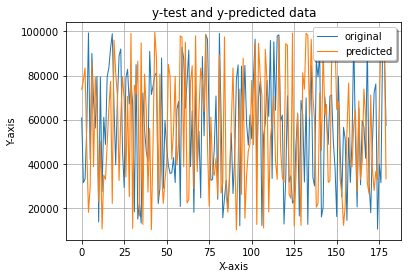

In [20]:
import matplotlib.pyplot as plt
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, prdct, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

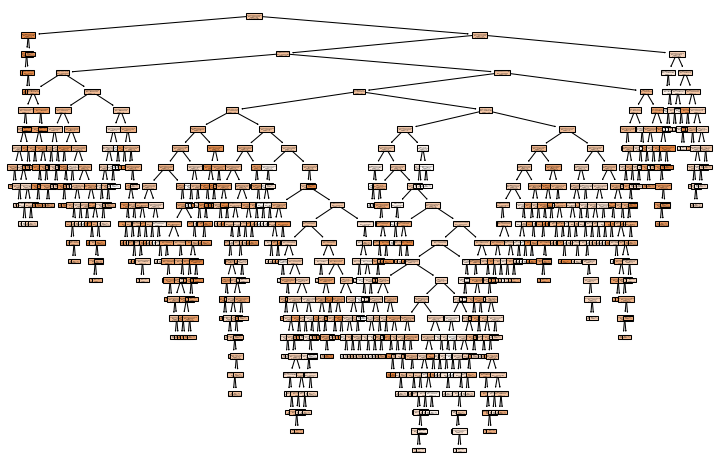

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi = 75)
plot_tree(model,filled=True,feature_names=x.columns);